In [2]:
import os
from pathlib import Path
import shutil
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import open3d as o3d
import seaborn as sns

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [3]:
# 读取原始数据文件名列表
carla_dir = './data/carla_scene_02_unnorm'
file_list = os.listdir(carla_dir)


In [4]:
# d = 1 Total waste data:1212
# d = 0.5 Total waste data:1196
# still -- remove steady point
# move -- use 4d data



In [4]:
# file = file_list[-1]
# if file[-3:] == 'npy':
#     raw_data = np.load(carla_dir + '/' +file)
# elif file[-3:] == 'txt':
#     raw_data = np.loadtxt(carla_dir + '/' +file)
# elif file[-3:] == 'npz':
#     raw_data = np.load(carla_dir + '/' +file)['arr_0']
# print(raw_data.shape)

# speed = raw_data[: ,3]
# print(speed.shape)
# # df = pd.DataFrame({"speed" : speed})
# # fig, ax = plt.subplots(figsize=(10, 7))
# # df.plot(kind="kde",ax=ax, linewidth=3, title="Speed Distribution")

# sns.kdeplot(data=speed,common_norm=True,cumulative=True)



In [6]:
waste_file_list = []
speed_list_crw = []
speed_list_pla = []
valid_file_list = []
waste = 0
for file in file_list:
    if file[-3:] == 'npy':
        raw_data = np.load(carla_dir + '/' +file)
    elif file[-3:] == 'txt':
        raw_data = np.loadtxt(carla_dir + '/' +file)
    elif file[-3:] == 'npz':
        raw_data = np.load(carla_dir + '/' +file)['arr_0']
    # print(raw_data.shape)
    speed = raw_data[: ,3] 
    speed = np.sort(speed) # 排序速度
    # sns.kdeplot(data=speed,common_norm=True,cumulative=True)
    base = speed[0] # 设置初始基准
    num = 0 # 记录区间数
    invalid = False
    for s in speed:
        dif = (float)(s - base)
        if dif < 0.5: # 在区间内
            num += 1
            continue
        if num/speed.size > 0.9: # 区间结束判断
            # 拥挤区间
            waste += 1
            
            waste_file_list.append(file)
            invalid = True
            break
        else:
            # 正常区间
            num = 0
            base = s
    if invalid == True:
        # 拥挤区间
        # sns.kdeplot(data=speed)
        speed_list_crw.append(speed)
        continue
    # valid_file_list.append(file)
    speed_list_pla.append(speed)
    # sns.kdeplot(data=speed,cumulative=True)
print("Total waste: %d" % waste)


Total waste: 1196


In [16]:
# 测试块
# print(speed_list_pla[1].shape)
# np.save('valid_file.npy', valid_file_list)
# print(1)

# 移动文件
# valid_file.npy
# srcfile 需要复制、移动的文件   
# dstpath 目的地址
 
import os
import shutil
from glob import glob
 
def mycopyfile(srcfile,dstpath):                       # 复制函数
    if not os.path.isfile(srcfile):
        print ("%s not exist!"%(srcfile))
    else:
        fpath,fname=os.path.split(srcfile)             # 分离文件名和路径
        if not os.path.exists(dstpath):
            os.makedirs(dstpath)                       # 创建路径
        shutil.copy(srcfile, dstpath + fname)          # 复制文件
        print ("copy %s -> %s"%(srcfile, dstpath + fname))
 
 
src_dir = './data/carla_scene_02_unnorm'
dst_dir = './data/carla_scene_02_valid/'                                    # 目的路径记得加斜杠
valid_file_list = np.load('valid_file.npy')
# src_file_list = glob(src_dir + valid_file_list)                    # glob获得路径下所有文件，可根据需要修改
for srcfile in valid_file_list:
    # mycopyfile(srcfile, dst_dir)                       # 复制文件
    srcfile = src_dir+ '/' + srcfile
    mycopyfile(srcfile, dst_dir)   

copy ./data/carla_scene_02_unnorm/0000000221.npz -> ./data/carla_scene_02_valid/0000000221.npz
copy ./data/carla_scene_02_unnorm/0000000224.npz -> ./data/carla_scene_02_valid/0000000224.npz
copy ./data/carla_scene_02_unnorm/0000000227.npz -> ./data/carla_scene_02_valid/0000000227.npz
copy ./data/carla_scene_02_unnorm/0000000230.npz -> ./data/carla_scene_02_valid/0000000230.npz
copy ./data/carla_scene_02_unnorm/0000000233.npz -> ./data/carla_scene_02_valid/0000000233.npz
copy ./data/carla_scene_02_unnorm/0000000236.npz -> ./data/carla_scene_02_valid/0000000236.npz
copy ./data/carla_scene_02_unnorm/0000000239.npz -> ./data/carla_scene_02_valid/0000000239.npz
copy ./data/carla_scene_02_unnorm/0000000242.npz -> ./data/carla_scene_02_valid/0000000242.npz
copy ./data/carla_scene_02_unnorm/0000000245.npz -> ./data/carla_scene_02_valid/0000000245.npz
copy ./data/carla_scene_02_unnorm/0000000248.npz -> ./data/carla_scene_02_valid/0000000248.npz
copy ./data/carla_scene_02_unnorm/0000000251.npz -

Text(0.5, 1.0, 'FFT Curve')

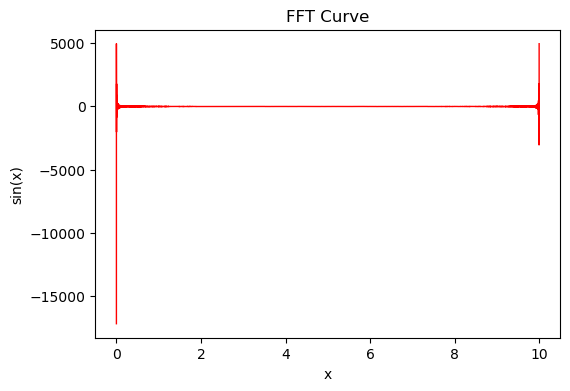

In [66]:
# fft转换
data = speed_list_crw[0]
data = speed_list_pla[6]
y = np.fft.fft(data)
x = np.linspace(0, 10, y.size)
# y = speed_list_crw[10]
plt.figure(figsize=(6,4))
plt.plot(x,y,color="red",linewidth=1)
plt.xlabel("x") #xlabel、ylabel：分别设置X、Y轴的标题文字。
plt.ylabel("sin(x)")
plt.title("FFT Curve") # title：设置子图的标题。
# plt.ylim(-10,10)# xlim、ylim：分别设置X、Y轴的显示范围。


In [35]:
waste_file_list = np.load('waste_file.npy')
waste_file_list = np.array(waste_file_list)
print(waste_file_list[:4])

['0000000215.npz' '0000000218.npz' '0000000284.npz' '0000000287.npz']


In [36]:
vis = o3d.visualization.Visualizer()
vis.create_window(window_name='pcd', width=800, height=600)
colors_0 = np.random.randint(255, size=(23, 3)) / 255.
pcd = o3d.geometry.PointCloud()
to_reset = True
vis.add_geometry(pcd)

for f in waste_file_list:
    
    if file[-3:] == 'npy':
        raw_data = np.load(carla_dir + '/' +file)
    elif file[-3:] == 'txt':
        raw_data = np.loadtxt(carla_dir + '/' +file)
    elif file[-3:] == 'npz':
        raw_data = np.load(carla_dir + '/' +file)['arr_0']
    
    points = raw_data[:, :4]
    
    pcd.points = o3d.utility.Vector3dVector(points[:, :3])

    
    vis.update_geometry(pcd)
    if to_reset:
        vis.reset_view_point(True)
        to_reset = False
    vis.poll_events()
    vis.update_renderer()
    

    

    

KeyboardInterrupt: 